In [1]:
%run ./tools.ipynb
# import all the necessary modules 
# import all functions needed to post process

In [2]:
%%time
### this cell could do all post-processing for a case, over a few months, or one month

year = 2018

for imonth in range(11,13):

    case_name = 'CO2-net-2018-' + month_string(imonth)
    mod_dir = '/geos/u73/msadiq/GEOS-Chem/rundirs/ensemble_runs/' + case_name + '/nd51/'

    bpch_to_nc_mass(data_dir = mod_dir,
                        year = year,
                        month = imonth)

    combine_daily_to_one(data_dir = mod_dir,
                         year = year,
                         month = imonth,
                         str1 = 'ts_satellite.',
                         str2 = '.nc')

    flatten_4d_to_2d(data_dir = mod_dir,
                         year = year,
                         month = imonth,
                         str1 = 'ts_satellite.',
                         str2 = '.nc')

    interpolate_model_to_satellite2(mod_dir = mod_dir, 
                                       sat_dir = '/geos/u73/msadiq/satellite/oco-2/', 
                                       year = year, 
                                       month = imonth, 
                                       str1_mod = '2d_ts_satellite.', 
                                       str1_sat = '2d_OCO2_extract_',
                                       background = 100)
    delta_Y(mod_dir = mod_dir, 
            sat_dir = '/geos/u73/msadiq/satellite/oco-2/', 
            year = year, 
            month = imonth, 
            str1_mod = 'interpolated_2d_ts_satellite.', 
            str1_sat = '2d_OCO2_extract_',
            mode = 'N')


converted daily bpch outputs to netcdf format
created ts_satellite.201811.nc
created 2d_ts_satellite.201811.nc
interpolation began
SpeciesConc_CO2Tag1 done
SpeciesConc_CO2Tag2 done
SpeciesConc_CO2Tag3 done
SpeciesConc_CO2Tag4 done
SpeciesConc_CO2Tag5 done
SpeciesConc_CO2Tag6 done
SpeciesConc_CO2Tag7 done
SpeciesConc_CO2Tag8 done
SpeciesConc_CO2Tag9 done
SpeciesConc_CO2Tag10 done
SpeciesConc_CO2Tag11 done
SpeciesConc_CO2Tag12 done
SpeciesConc_CO2Tag13 done
SpeciesConc_CO2Tag14 done
SpeciesConc_CO2Tag15 done
SpeciesConc_CO2Tag16 done
SpeciesConc_CO2Tag17 done
SpeciesConc_CO2Tag18 done
SpeciesConc_CO2Tag19 done
SpeciesConc_CO2Tag20 done
SpeciesConc_CO2Tag21 done
SpeciesConc_CO2Tag22 done
created interpolated_2d_ts_satellite.201811.nc
created delta_y0_model_N_11.nc
converted daily bpch outputs to netcdf format
created ts_satellite.201812.nc
created 2d_ts_satellite.201812.nc
interpolation began
SpeciesConc_CO2Tag1 done
SpeciesConc_CO2Tag2 done
SpeciesConc_CO2Tag3 done
SpeciesConc_CO2Tag4 do

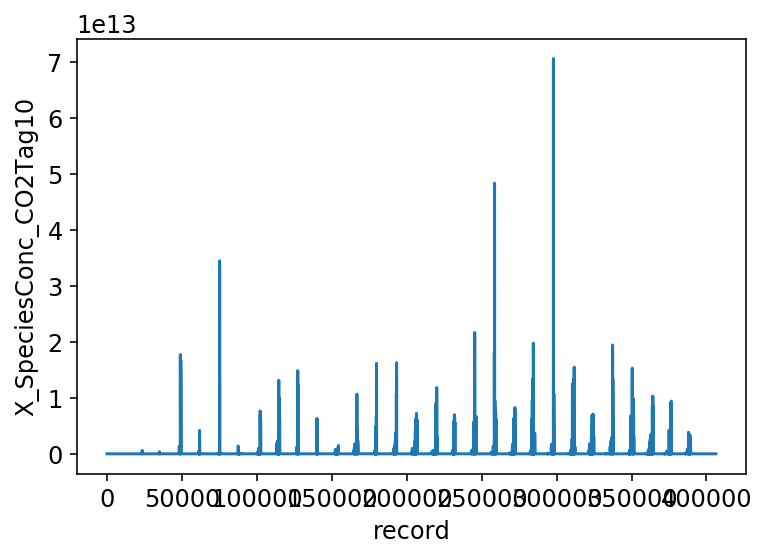

In [2]:
mod_dir = '/geos/u73/msadiq/GEOS-Chem/rundirs/ensemble_runs/CO2-casa-2018-03/nd51/'
fname = 'delta_y0_model_N_3.nc'
#fname = '2d_ts_satellite.201803.nc'
ds = xr.open_dataset(mod_dir + fname)
ds['X_SpeciesConc_CO2Tag10'].plot()

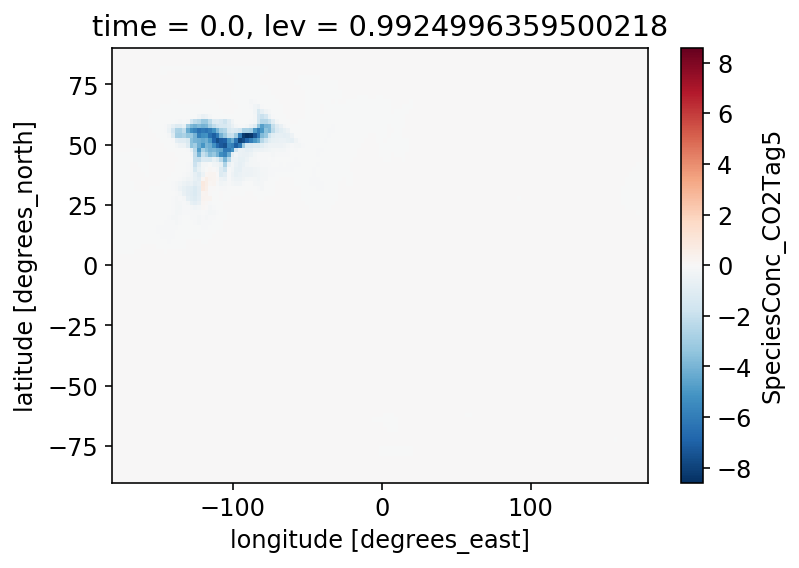

In [3]:
# Convert one bpch file and check
case_name = 'CO2-bio-2018-07'
directory = '/geos/u73/msadiq/GEOS-Chem/rundirs/ensemble_runs/' + case_name + '/'
name_bpch = 'ts_satellite.20180708.bpch'
bpchfile = directory + name_bpch
tinfo_file = directory + 'tracerinfo.dat'
dinfo_file = directory + 'diaginfo.dat'
# Output
output_directory = '/geos/u73/msadiq/GEOS-Chem/rundirs/ensemble_runs/' + case_name + '/'
ncfile = output_directory + 'ts_satellite.20180708.nc'

bpch_2_netcdf(bpchfile=bpchfile, 
                tinfo_file=tinfo_file, 
                dinfo_file=dinfo_file, 
                ncfile=ncfile)
ds_tmp = xr.open_dataset(ncfile)
diff = ds_tmp['SpeciesConc_CO2Tag11'] - ds_tmp['SpeciesConc_CO2Tag13']
#diff[0,0,:,:].plot()
dr = (ds_tmp['SpeciesConc_CO2Tag5'][0,0,:,:] - 1e5)/1e3
dr.plot()